In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scipy

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
pd.set_option("display.max_rows", 100)

In [10]:
df = pd.read_csv("Data/train.csv")

Text(0, 0.5, 'Nucleotide frequency')

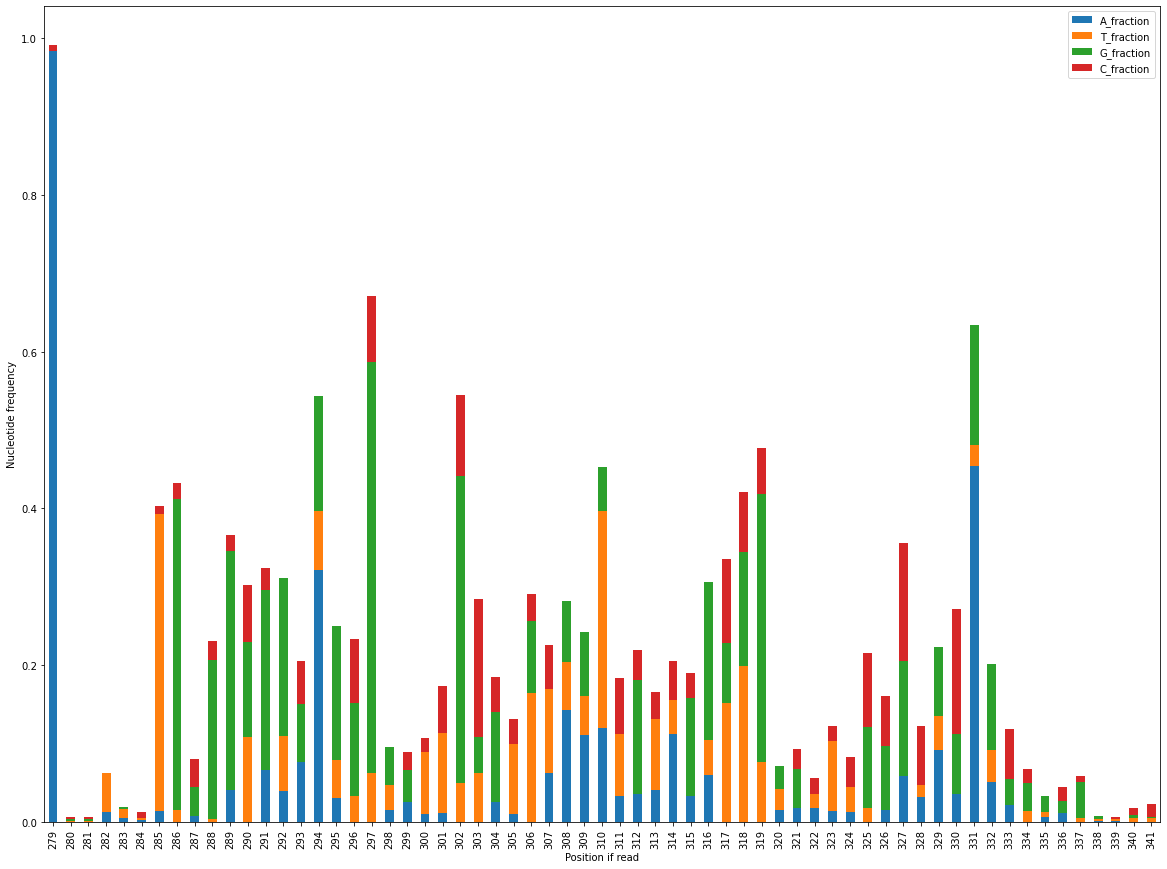

In [11]:
plt.rc("figure", figsize=(20, 15))
df.set_index("pos").iloc[:, [-4, -3, -2, -1]].plot(kind="bar", stacked=True)
plt.xlabel("Position if read")
plt.ylabel("Nucleotide frequency")

In [12]:
df.query("matches > matches.mean()").loc[:,["pos", "reads_all", "mismatches", "deletions", "insertions"]].to_csv("train.csv")

# EDA

Dataset - https://www.kaggle.com/mirichoi0218/insurance

In [13]:
insur_data = pd.read_csv("Data/insurance.csv")

In [14]:
insur_data[insur_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


One of the observations is full duplicate. We can remove it.

In [15]:
insur_data = insur_data.drop(581)

<AxesSubplot:>

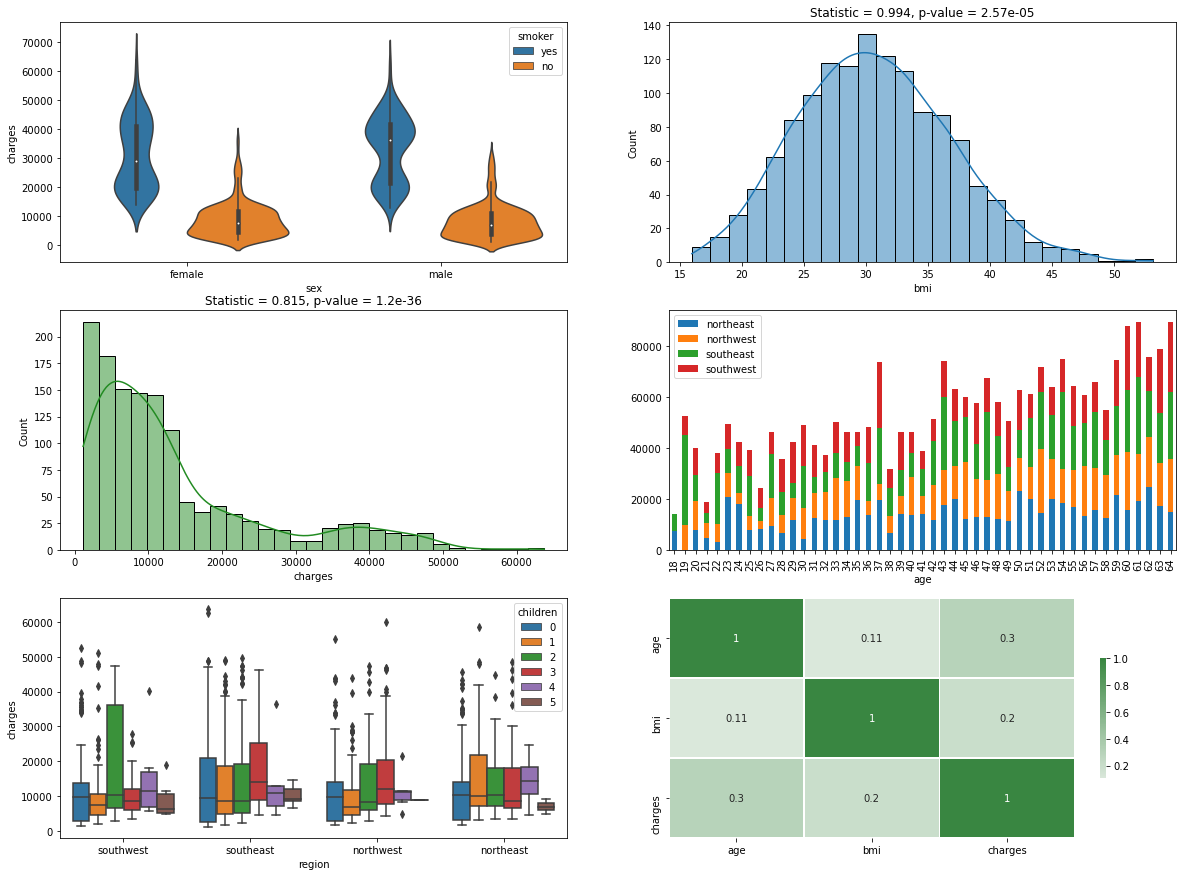

In [16]:
fig, axes = plt.subplots(3, 2)
sns.violinplot(x="sex", y="charges", hue="smoker", data=insur_data, ax=axes[0][0])

sns.histplot(insur_data.bmi, ax=axes[0][1], kde=True)
norm_test = stats.shapiro(insur_data.bmi)
axes[0][1].set_title("Statistic = %.3f, p-value = %.3g" % norm_test)

sns.histplot(insur_data.charges, ax=axes[1][0], kde=True, color="forestgreen")
norm_test = stats.shapiro(insur_data.charges)
axes[1][0].set_title("Statistic = %.3f, p-value = %.3g" % norm_test)

insur_data.pivot(columns="region", values="charges").join(insur_data).groupby("age").agg("mean").drop(columns=["bmi", "children", "charges"]) \
    .plot(kind="bar", stacked=True, ax=axes[1][1])

sns.boxplot(x="region", y="charges", hue="children", data=insur_data, ax=axes[2][0])

cmap = sns.diverging_palette(6.8, 129.9, as_cmap=True)
cor = insur_data.corr().drop(index="children", columns="children")

sns.heatmap(cor, cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[2][1], annot=True)

Smokers pay for insurance more and it does not depend on age. Distribution of body mass index **bmi** and **charges** significantly differ from normal. There is no strong correlation beetween variables, however there is weak positive сorrelation between **charges** и **age**. There is no great differences between insurance price depending on regions (**region**), but there are some deviations of that price depending on **age** and **region**, which can be caused by insufficiency of observations. 

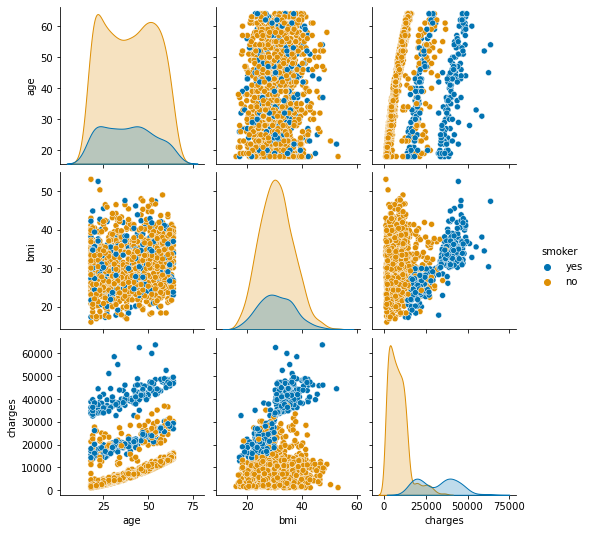

In [17]:
sns.pairplot(insur_data.drop(columns="children"), hue="smoker", palette="colorblind")

Here we can observe unussual pattern in **age - charges** plot. There are 3 distinc groups. Two or them depend on **smoker** variable and the third's origin remains unknown.